<a href="https://colab.research.google.com/github/abhinavj98/machine-learning/blob/master/gan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%tensorflow_version 1.x
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from random import randint
import  os
import numpy as np


TensorFlow 1.x selected.


In [3]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
print("Train Images:", train_images.shape, "Test Images:", test_images.shape)
label_text = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

Train Images: (60000, 28, 28) Test Images: (10000, 28, 28)


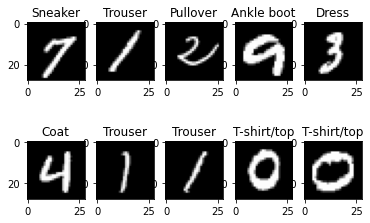

In [5]:
for i in range(10):
  j = randint(0,60000)
  plt.subplot(2,5,i+1)
  plt.title(label_text[train_labels[j]])
  plt.imshow(train_images[j], cmap = 'gray')
plt.show()

In [6]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images = train_images/255.0
test_images = test_images/255.0
print(train_images[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [0]:
class GAN:
  def make_model(self):
    self.gen = self.generator()
    self.dis = self.discriminator()
        
  def run_generator(self, z, is_training):
    x = self.gen['dense1'](z)
    x = self.gen['dropout1'](x, is_training)
    x = self.gen['bnorm1'](x, is_training)
    x = tf.reshape(x, (-1,7,7,1))
    x = self.gen['convt1'](x)
    x = self.gen['dropout2'](x, is_training)
    x = self.gen['bnorm2'](x, is_training)
    output = self.gen['convt2'](x)
    # x = self.gen['dropout3'](x, is_training)
    # x = self.gen['bnorm3'](x, is_training)
    # x = self.gen['convt3'](x)
    # x = self.gen['dropout4'](x, is_training)
    # x = self.gen['bnorm4'](x, is_training)
    # output = self.gen['convt4'](x)
    return output
  
  def run_discriminator(self, z):
    x = self.dis['conv1'](z)
    x = self.dis['dropout1'](x)
    x = self.dis['conv2'](x)
    x = self.dis['dropout2'](x)
    x = self.dis['conv3'](x)
    x = self.dis['dropout3'](x)
    x = self.dis['flatten'](x)
    logits = self.dis['dense1'](x)
    output = self.dis['logits'](x)
    return logits, output
  
  def generator(self):
    layers = {}
    keep_prob = 0.5
    momentum = 0.99
    nodes = 7 * 7
    layers['dense1'] = tf.keras.layers.Dense(units=nodes, activation=tf.nn.leaky_relu, name = 'gen/dense1')
    layers['dropout1'] = tf.keras.layers.Dropout(keep_prob, name = 'gen/dropout1')      
    layers['bnorm1'] = tf.keras.layers.BatchNormalization(momentum = momentum, name = 'gen/bnorm1')  
    layers['convt1'] = tf.keras.layers.Conv2DTranspose(kernel_size=5, filters=64, strides=2, padding='same', activation=tf.nn.leaky_relu, name = 'gen/convt1')
    layers['dropout2'] = tf.keras.layers.Dropout(keep_prob, name = 'gen/dropout2')
    layers['bnorm2'] = tf.keras.layers.BatchNormalization(momentum=momentum, name = 'gen/bnorm2')
    layers['convt2'] = tf.layers.Conv2DTranspose(kernel_size=3, filters=1, strides=2, padding='same', activation=tf.nn.leaky_relu, name = 'gen/convt2')
    layers['dropout3'] = tf.keras.layers.Dropout(keep_prob, name = 'gen/dropout3')
    layers['bnorm3'] = tf.keras.layers.BatchNormalization(momentum=momentum, name = 'gen/bnorm3')
    layers['convt3'] = tf.layers.Conv2DTranspose(kernel_size=3, filters=1, strides=2, padding='same', activation=tf.nn.leaky_relu, name = 'gen/convt3')
    layers['dropout4'] = tf.keras.layers.Dropout(keep_prob, name = 'gen/dropout4')
    layers['bnorm4'] = tf.keras.layers.BatchNormalization(momentum=momentum, name = 'gen/bnorm4')
    layers['convt4'] = tf.keras.layers.Conv2D(kernel_size=5, filters=1, strides=1, padding='same', activation=tf.nn.sigmoid, name = 'gen/convt4')

    return layers

  def discriminator(self):
    layers = {}
    keep_prob = 0.5
    layers['conv1'] = tf.keras.layers.Conv2D(kernel_size=5, filters=64, strides=2, padding='same', activation=tf.nn.leaky_relu, input_shape = (28,28,1), name = 'dis/conv1')
    layers['dropout1'] = tf.keras.layers.Dropout(keep_prob, name = 'dis/dropout1')
    layers['conv2'] = tf.keras.layers.Conv2D(kernel_size=5, filters=64, strides=2, padding='same', activation=tf.nn.leaky_relu, name = 'dis/conv2')
    layers['dropout2'] = tf.keras.layers.Dropout(keep_prob,name = 'dis/dropout2')
    layers['conv3'] = tf.keras.layers.Conv2D(kernel_size=5, filters=64, strides=1, padding='same', activation=tf.nn.leaky_relu, name = 'dis/conv3')
    layers['dropout3'] = tf.keras.layers.Dropout(keep_prob, name = 'dis/dropout3')
    layers['flatten'] = tf.keras.layers.Flatten(name = 'dis/flatten')
    layers['dense1']=tf.keras.layers.Dense(units=128,activation=tf.nn.leaky_relu, name = 'dis/dense1')
    layers['logits']=tf.keras.layers.Dense(units=1, activation = tf.nn.sigmoid, name = 'dis/logits')

    return layers
  
#   def train_step_generator(self):
    

In [0]:
def loss_func(logits_in,labels_in):
  return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits_in,labels=labels_in))
  
  
def generate_fakes(n):
  x = np.random.rand(n,28*28)
  x = x*2-1
  return x


def dis_accuracy(D_logits, thresh, pos):
  D_logits = D_logits.reshape(-1)
  if not pos:
    return len(D_logits[np.where(D_logits < thresh)])/len(D_logits)
  else:
    return len(D_logits[np.where(D_logits > thresh)])/len(D_logits)

In [0]:
tf.get_default_graph()
tf.reset_default_graph()
fashion_GAN = GAN()
fashion_GAN.make_model()


# D_logits_fake= fashion_GAN.run_discriminator(fake_images)
# D_logits_real= fashion_GAN.run_discriminator(real_images)
# D_real_loss=loss_func(D_logits_real, tf.ones_like(D_logits_real)*0.9) #Smoothing for generalization
# D_fake_loss=loss_func(D_logits_fake, tf.zeros_like(D_logits_fake))
# D_loss=D_real_loss+D_fake_loss

In [0]:

real_images=tf.placeholder(tf.float32,shape=[None,28, 28, 1])
# fake_images=tf.placeholder(tf.float32,shape=[None,28, 28, 1])
z=tf.placeholder(tf.float32,shape=[None,100])

G = fashion_GAN.run_generator(z, True)
D_logits_real, D_output_real = fashion_GAN.run_discriminator(real_images)
D_logits_fake, D_output_fake = fashion_GAN.run_discriminator(G)
D_real_loss = loss_func(D_logits_real, tf.ones_like(D_logits_real)*0.9) #Smoothing for generalization
D_fake_loss = loss_func(D_logits_fake, tf.zeros_like(D_logits_fake)+0.1)
D_loss = (D_real_loss + D_fake_loss)/2
G_loss = loss_func(D_logits_fake,tf.ones_like(D_logits_fake))


In [0]:

samples=[] #generator examples
D_losses = []
G_losses = []

In [25]:
lr_D=0.0004
lr_G=0.0004
batch_size = 128
#Do this when multiple networks interact with each other
tvars=tf.trainable_variables()  #returns all variables created(the two variable scopes) and makes trainable true
d_vars=[var for var in tvars if 'dis' in var.name]
g_vars=[var for var in tvars if 'gen' in var.name]

D_trainer=tf.train.AdamOptimizer(lr_D, 0.5).minimize(D_loss,var_list=d_vars)
G_trainer=tf.train.AdamOptimizer(lr_G, 0.5).minimize(G_loss,var_list=g_vars)
epochs=1000
init=tf.global_variables_initializer()
saver = tf.train.Saver()

print(d_vars, g_vars)


[<tf.Variable 'dis/conv1/kernel:0' shape=(5, 5, 1, 64) dtype=float32>, <tf.Variable 'dis/conv1/bias:0' shape=(64,) dtype=float32>, <tf.Variable 'dis/conv2/kernel:0' shape=(5, 5, 64, 64) dtype=float32>, <tf.Variable 'dis/conv2/bias:0' shape=(64,) dtype=float32>, <tf.Variable 'dis/conv3/kernel:0' shape=(5, 5, 64, 64) dtype=float32>, <tf.Variable 'dis/conv3/bias:0' shape=(64,) dtype=float32>, <tf.Variable 'dis/dense1/kernel:0' shape=(3136, 128) dtype=float32>, <tf.Variable 'dis/dense1/bias:0' shape=(128,) dtype=float32>, <tf.Variable 'dis/logits/kernel:0' shape=(3136, 1) dtype=float32>, <tf.Variable 'dis/logits/bias:0' shape=(1,) dtype=float32>] [<tf.Variable 'gen/dense1/kernel:0' shape=(100, 49) dtype=float32>, <tf.Variable 'gen/dense1/bias:0' shape=(49,) dtype=float32>, <tf.Variable 'gen/bnorm1/gamma:0' shape=(49,) dtype=float32>, <tf.Variable 'gen/bnorm1/beta:0' shape=(49,) dtype=float32>, <tf.Variable 'gen/convt1/kernel:0' shape=(5, 5, 64, 1) dtype=float32>, <tf.Variable 'gen/convt1/b

TRAININGGGGGGGGG
on epoch0
Saving


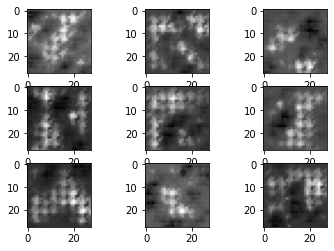

lossD: 0.32613545656204224, lossG: 2.359825372695923, accG: 0.0, accD: 1.0
on epoch1
on epoch2
on epoch3
on epoch4
on epoch5
on epoch6
on epoch7
on epoch8
on epoch9
on epoch10
Saving


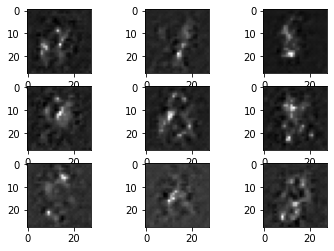

lossD: 0.33107101917266846, lossG: 2.2945871353149414, accG: 0.0, accD: 0.995637109375
on epoch11
on epoch12
on epoch13
on epoch14
on epoch15
on epoch16
on epoch17
on epoch18
on epoch19
on epoch20
Saving


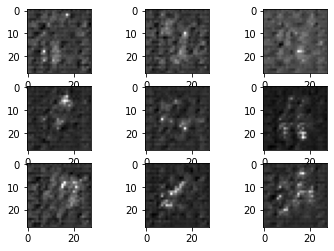

lossD: 0.3261829912662506, lossG: 2.3006813526153564, accG: 0.0, accD: 0.999130078125
on epoch21
on epoch22
on epoch23
on epoch24
on epoch25
on epoch26
on epoch27
on epoch28
on epoch29
on epoch30
Saving


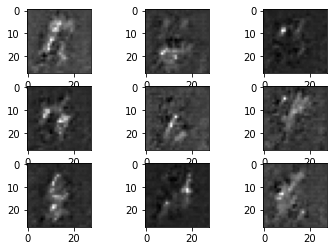

lossD: 0.3285718560218811, lossG: 2.333671808242798, accG: 0.0, accD: 0.996517578125
on epoch31
on epoch32
on epoch33
on epoch34
on epoch35
on epoch36
on epoch37
on epoch38
on epoch39
on epoch40
Saving


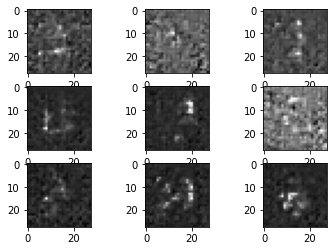

lossD: 0.3265810012817383, lossG: 2.3119442462921143, accG: 0.0, accD: 0.9989488281250001
on epoch41
on epoch42
on epoch43
on epoch44
on epoch45
on epoch46
on epoch47
on epoch48
on epoch49
on epoch50
Saving


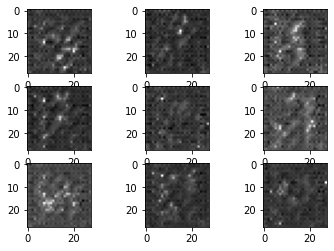

lossD: 0.3258541524410248, lossG: 2.2973737716674805, accG: 0.0, accD: 0.9993062500000001
on epoch51
on epoch52
on epoch53
on epoch54
on epoch55
on epoch56
on epoch57
on epoch58
on epoch59
on epoch60
Saving


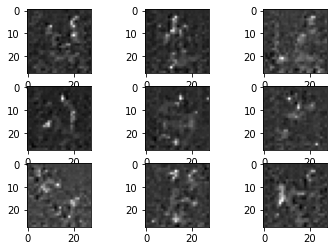

lossD: 0.32700324058532715, lossG: 2.295057773590088, accG: 0.0, accD: 0.9982585937499999
on epoch61
on epoch62
on epoch63
on epoch64
on epoch65
on epoch66
on epoch67
on epoch68
on epoch69
on epoch70
Saving


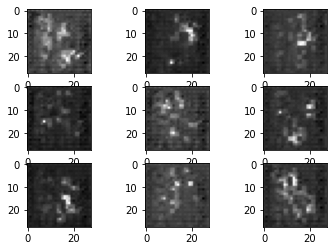

lossD: 0.32947835326194763, lossG: 2.329885482788086, accG: 0.0, accD: 0.99553125
on epoch71
on epoch72
on epoch73
on epoch74
on epoch75
on epoch76
on epoch77
on epoch78
on epoch79
on epoch80
Saving


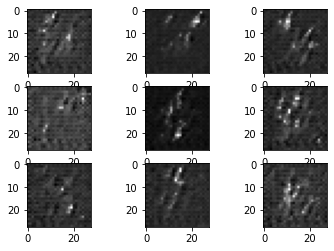

lossD: 0.3254515528678894, lossG: 2.2989344596862793, accG: 0.0, accD: 0.999748046875
on epoch81
on epoch82
on epoch83
on epoch84
on epoch85
on epoch86
on epoch87
on epoch88
on epoch89
on epoch90
Saving


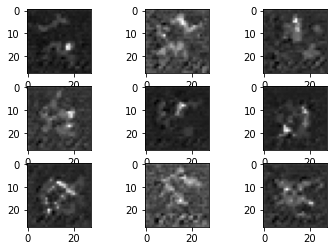

lossD: 0.32667815685272217, lossG: 2.2878198623657227, accG: 0.0, accD: 0.998273828125
on epoch91
on epoch92
on epoch93
on epoch94
on epoch95
on epoch96
on epoch97
on epoch98
on epoch99
on epoch100
Saving


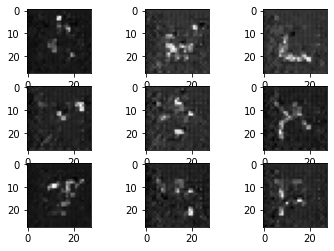

lossD: 0.3259284496307373, lossG: 2.294057607650757, accG: 0.0, accD: 0.9992
on epoch101
on epoch102
on epoch103
on epoch104
on epoch105
on epoch106
on epoch107
on epoch108
on epoch109


In [0]:
with tf.Session() as sess:
  l = False
  sess.run(init)
  restore = False
  num_batches = train_images.shape[0]//batch_size
  if restore:
    if True or os.path.exists("/content/drive/My Drive/mnist_gan_checkpt.ckpt"):
      saver.restore(sess, "/content/drive/My Drive/mnist_gan_checkpt.ckpt")
      print("Restored model")

  print("TRAININGGGGGGGGG")
 
    
  for epoch in range(epochs):
    for i in range(num_batches):
      batch = train_images[batch_size*i:(batch_size)*(i+1)]
      batch_images = batch*2-1
      batch_images = np.reshape(batch_images, (-1,28,28,1))
      batch_z = np.random.uniform(-1,1,size=(batch_size,100))
      sess.run(G_trainer, feed_dict={z:batch_z})
      for l in range(3):
        batch_z = np.random.uniform(-1,1,size=(batch_size,100))
        sess.run(D_trainer, feed_dict = {real_images:batch_images,z:batch_z})
      
    print("on epoch{}".format(epoch))
    
    if epoch%10 == 0:
      print("Saving")
      # save_path = saver.save(sess, "/content/drive/My Drive/mnist_gan_checkpt.ckpt")
      batch_z = np.random.uniform(-1,1,size=(10000,100))
      sample_z=np.random.uniform(-1,1,size=(9,100))
      gen_sample=sess.run(G,feed_dict={z:sample_z})
      # print(sample_z)
      for k in range(9):
        plt.subplot(3,3,k+1)
        plt.imshow((gen_sample[k].reshape(28,28)+1)/2, cmap = 'gray')
      plt.show()
      D_real, D_fake, lossD, lossG = sess.run([D_logits_real, D_logits_fake, D_loss, G_loss], feed_dict={real_images:np.reshape(test_images*2-1, (-1,28,28,1)), z:batch_z})
      D_acc_real = dis_accuracy(np.array(D_real), 0.5, True) 
      D_acc_fake = dis_accuracy(np.array(D_fake), 0.5, False)
      G_acc = dis_accuracy(np.array(D_fake), 0.5, True)

      print("lossD: {}, lossG: {}, accG: {}, accD: {}".format(lossD, lossG, G_acc, (D_acc_real + D_acc_fake)/2))
      samples.append(gen_sample)
      D_losses.append(lossD)
      G_losses.append(lossG)

   
    


In [0]:
 with tf.Session() as sess:
  sess.run(init)
  restore = True
  if restore:
    if os.path.exists("/content/drive/My Drive/checkpoint"):
      saver.restore(sess, "/content/drive/My Drive/checkpt.ckpt")
      print("Restored model")
    sample_z = np.random.uniform(-1,1,(10,100))
    gen_sample=sess.run(fashion_GAN.run_generator(z, False),feed_dict={z:sample_z})
      


In [0]:
gen_sample[1][:,:].shape

In [0]:
for i in range(11):
  plt.subplot(2,6,i+1)
  plt.imshow(((gen_sample[i, :, :])))
plt.show()

In [0]:
with tf.Session() as sess:
  sess.run(init)
  for epoch in range(epochs):
    if epoch%100 == 0:
      print("Saving")
#       save_path = saver.save(sess, "/content/drive/My Drive/checkpt.ckpt")
      num_batches=train_images.shape[0]//batch_size
    if epoch%5 == 0:
        logits_fake = sess.run([D_logits_fake], feed_dict = {fake_images : np.random.uniform(-1,1,size=(train_images.shape[0],28,28,1))})
        logits_real = sess.run([D_logits_real], feed_dict = {real_images : train_images.reshape(-1,28,28,1)})
        print("Epoch : {}, Loss_fake : {}, Loss_real: {}".format(epoch, dis_accuracy(np.array(logits_fake), 0.5, False), dis_accuracy(np.array(logits_real), 0.5, True)))
    for i in range(num_batches):
      batch = train_images[batch_size*i:(batch_size)*(i+1)]
      batch_images = batch.reshape((batch_size,28,28,1))
      batch_images = batch_images*2-1
      batch_fake = np.random.uniform(-1,1,size=(batch_size,28,28,1))
      lossD, _=sess.run([D_loss, D_trainer],feed_dict={real_images:batch_images,fake_images:batch_fake})
    

In [0]:
plt.imshow(samples[68].reshape(28,28))
plt.show()

In [0]:
examples = []
with tf.Session() as sess:
    sess.run(init)
    for i in range(100):
      sample_z=np.random.uniform(-1,1,size=(1,100))
      gen_sample=sess.run(fashion_GAN.run_generator(z),feed_dict={z:sample_z})
      examples.append(gen_sample)

In [0]:
for i in range(11):
  plt.subplot(2,6,i+1)
  plt.imshow((samples[i].reshape(28,28)+1)/2, cmap = 'gray')
plt.show()

In [0]:
len(samples)

In [0]:
print(tf.trainable_variables())

In [0]:
with tf.Session() as sess:
  a = sess.run(G, feed_dict = {z : np.random.uniform(-1,1,size=(1,100))})

In [0]:
print(lossD)